In [5]:
import numpy as np
import os
import sys
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
%matplotlib inline

# Quantatizing Disaster Data

Dataset is a collection of aerial images of pre and post disaster sites

## Goal

1. Determine if any buildings exist on a per pixel basis
2. Compare the two images and determine the amount of damage done to the structures (if any exist)

## Inputs

Images are 1024x1024 png files

1. Given a pair of 1024 images pre and post disaster. 
2. output a pair of 1024 images.

## Output images

1. First image will be 0 or 1 on a per pixel basis determining whether a building is present
2. Second image will be 1-4 on a per pixel basis, determining the extent of building damage.

In [104]:
class DisasterData(object):
    def __init__(self):
        self.folder = '/Users/morgan/Code/RouteMuse/Data/disaster_train'
        self.train_folder = self.folder+'/images'
        self.labels_folder = self.folder+'/labels'
        self.trainset = DisasterData.load_data(self.train_folder)
        self.labels = DisasterData.load_data(self.labels_folder)
        self.trainset_dict = {name:index for index,name in enumerate(self.trainset)}
        self.label_dict = {name:index for index,name in enumerate(self.labels)}
        # Load data pairwise into X and y. Each X should contain two images, pre and post
#         self.X_train = 
#         self.y_train = 
        
    @staticmethod
    def load_data(path):
        data = []
        for file in os.listdir(path):
            if file != '.DS_Store':
                data.append(file)
        return data
        
    def find_label(self,file_name):
        print(file_name)
        label_name = file_name.rstrip('.png')+'.json'
        print('label_name',label_name)
        index = self.label_dict[label_name]
        print('index',index)
        return self.labels[index]
    
    def read_label(self,name):
        label = self.find_label(name)
        print(label)
        label_path = folder+labels_folder+'/'+label
        with open(label_path) as json_file:
            label_im = json.load(json_file)
        print(label_im)
    

In [105]:
# from PIL import Image
# def save_segmap(segmap_array, file_name):
#     colors = [[  0,   0, 200], # Blue:   Background
#               [  0, 200,   0], # Green:  No Damage
#               [250, 125,   0], # Orange: Minor Damage
#               [250,  25, 150], # Pink:   Major Damage
#               [250,   0,   0]] # Red:    Destroyed
#     colors = np.array(colors).astype(np.uint8)
#     r = Image.fromarray(segmap_array.astype(np.uint8))
#     r.putpalette(colors)
#     r.save(file_name)

In [106]:
disaster = DisasterData()

In [107]:
disaster.read_label('guatemala-volcano_00000019_pre_disaster.png')
disaster.read_label('guatemala-volcano_00000019_post_disaster.png')

guatemala-volcano_00000019_pre_disaster.png
label_name guatemala-volcano_00000019_pre_disaster.json
index 1360
guatemala-volcano_00000019_pre_disaster.json
{'features': {'lng_lat': [{'properties': {'feature_type': 'building', 'uid': '7cf9788a-1f2e-4675-97f6-e28fe9f67097'}, 'wkt': 'POLYGON ((-90.83233705888077 14.43009193550256, -90.83239740060333 14.43009133721773, -90.83240099420122 14.43014786612779, -90.83238560465993 14.43014887763744, -90.83238777530079 14.43016907468947, -90.83232500628171 14.43017599202916, -90.83231611731391 14.43011653199903, -90.83233684129634 14.43011441655439, -90.83233705888077 14.43009193550256))'}, {'properties': {'feature_type': 'building', 'uid': '853fa2a6-3d17-4faa-a923-d4ff64459720'}, 'wkt': 'POLYGON ((-90.83219317303602 14.42996185765753, -90.83215928344484 14.42993641821469, -90.83217331814966 14.42991212717987, -90.83220794081942 14.4299368655319, -90.83219317303602 14.42996185765753))'}, {'properties': {'feature_type': 'building', 'uid': '72a70f6

In [62]:
disaster.find_label('hurricane-harvey_00000015_pre_disaster.png')
disaster.find_label('hurricane-harvey_00000015_post_disaster.png')

# 'hurricane-harvey_00000015_post_disaster.png'
# 'hurricane-harvey_00000015_pre_disaster.png'
# 'hurricane-harvey_00000015_post_disaster.json'
# 'hurricane-harvey_00000015_pre_disaster.json'

'hurricane-harvey_00000015_post_disaster.json'

In [33]:
path = folder+train_folder+'/'+train_images[0]
im = imageio.imread(path)

In [38]:
label_path = folder+labels_folder+'/'+labels[0]
with open(label_path) as json_file:
    label_im = json.load(json_file)

In [41]:
print(labels[:5])

['socal-fire_00000091_post_disaster.json', 'midwest-flooding_00000308_post_disaster.json', 'mexico-earthquake_00000164_post_disaster.json', 'midwest-flooding_00000207_pre_disaster.json', 'hurricane-michael_00000166_pre_disaster.json']


In [40]:
print(path)
print(im.shape)

/Users/morgan/Code/RouteMuse/Data/disaster_train/images/hurricane-harvey_00000015_pre_disaster.png
(1024, 1024, 3)


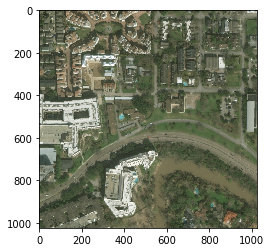

In [21]:
plt.imshow(im)

In [39]:
label_im

{'features': {'lng_lat': [], 'xy': []},
 'metadata': {'sensor': 'WORLDVIEW02',
  'provider_asset_type': 'WORLDVIEW02',
  'gsd': 2.5700748,
  'capture_date': '2018-11-14T18:42:58.000Z',
  'off_nadir_angle': 32.6742,
  'pan_resolution': 0.64383847,
  'sun_azimuth': 163.31218,
  'sun_elevation': 35.885086,
  'target_azimuth': 334.1289,
  'disaster': 'socal-fire',
  'disaster_type': 'fire',
  'catalog_id': '103001008513F200',
  'original_width': 1024,
  'original_height': 1024,
  'width': 1024,
  'height': 1024,
  'id': 'MjU3OTc0Mw.i8p2U_GajqGEF7YUgMkP4hioEG4',
  'img_name': 'socal-fire_00000091_post_disaster.png'}}

# Draw a rectangle around a polygon

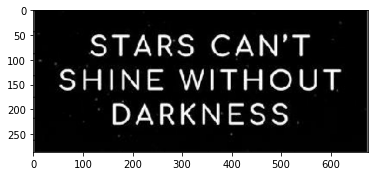

In [110]:
from skimage.measure import find_contours
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
orig_img = imread('/Users/morgan/Desktop/Screen Shot 2019-11-20 at 8.28.46 PM.png')
gray_img = rgb2gray(orig_img)
plt.imshow(gray_img,interpolation='nearest', cmap=plt.cm.gray)

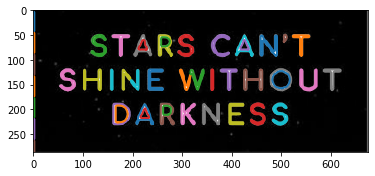

In [111]:
contours = find_contours(gray_img, 0.8)
fig, ax = plt.subplots()
ax.imshow(gray_img, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contours[n][:, 1], contours[n][:, 0], linewidth=2)
plt.show()

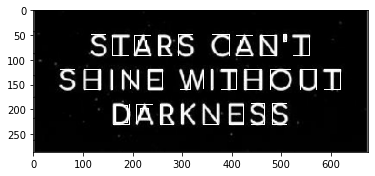

In [112]:
import numpy as np
from skimage.draw import polygon_perimeter
bounding_boxes = []
for contour in contours:
    Xmin = np.min(contour[:,0])
    Xmax = np.max(contour[:,0])
    Ymin = np.min(contour[:,1])
    Ymax = np.max(contour[:,1])

    bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
with_boxes  = np.copy(gray_img)
for box in bounding_boxes:
    #[Xmin, Xmax, Ymin, Ymax]
    r = [box[0],box[1],box[1],box[0], box[0]]
    c = [box[3],box[3],box[2],box[2], box[3]]
    rr, cc = polygon_perimeter(r, c, with_boxes.shape)
    with_boxes[rr, cc] = 1 #set color white
plt.imshow(with_boxes, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

[(398, 248, 5, 4), (398, 249, 4, 2), (208, 188, 35, 44), (207, 189, 35, 42), (217, 198, 16, 19), (217, 202, 16, 16), (482, 187, 32, 45), (482, 187, 32, 45), (438, 187, 31, 45), (438, 187, 31, 45), (395, 188, 30, 43), (395, 188, 30, 43), (342, 187, 35, 44), (299, 187, 28, 44), (299, 188, 28, 43), (257, 188, 28, 43), (257, 188, 28, 43), (263, 194, 14, 16), (263, 194, 14, 16), (161, 189, 34, 42), (161, 188, 34, 43), (167, 193, 23, 32), (167, 193, 23, 33), (178, 183, 6, 2), (318, 128, 1, 1), (538, 119, 36, 43), (538, 119, 36, 44), (425, 119, 38, 43), (358, 119, 7, 43), (358, 119, 7, 43), (180, 119, 33, 43), (180, 119, 33, 42), (195, 139, 1, 1), (586, 119, 35, 44), (587, 119, 35, 43), (479, 118, 43, 45), (479, 118, 43, 45), (484, 124, 34, 31), (484, 124, 33, 32), (378, 119, 34, 43), (379, 119, 33, 43), (295, 118, 51, 44), (232, 119, 31, 43), (232, 119, 31, 43), (157, 118, 5, 45), (158, 118, 1, 44), (101, 118, 37, 44), (53, 118, 32, 45), (53, 118, 32, 45), (281, 60, 6, 4), (284, 59, 2, 5), (

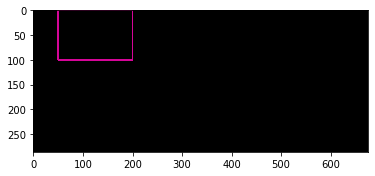

In [93]:
import cv2 as cv
import numpy as np
import argparse
import random as rng
rng.seed(12345)
def thresh_callback(val):
    threshold = val
    
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    
    
    _, contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    
    boxes = []
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
        boxes.append(boundRect[i])
    print(boundRect)
    
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
#     for i in range(len(contours)):
#         color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
#         cv.drawContours(drawing, contours_poly, i, color)
#         cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
#           (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
#         cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    i = 5
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
#     cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
#       (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    cv.rectangle(drawing, (50, 0), \
      (200, 100), color, 2)
    imgplot = plt.imshow(drawing)
    plt.show()
#     cv.imshow('Contours', drawing)

src = cv.imread('/Users/morgan/Desktop/Screen Shot 2019-11-20 at 8.28.46 PM.png')
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
# Convert image to gray and blur it
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
source_window = 'Source'
# cv.namedWindow(source_window)
# cv.imshow(source_window, src)
max_thresh = 255
thresh = 100 # initial threshold
cv.createTrackbar('Canny thresh:', source_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)
# cv.waitKey()

In [132]:
def return_bounding_boxes(img):
    max_thresh = 255
    threshold = 100 # initial threshold
    
    canny_output = cv.Canny(img, threshold, threshold * 2)
    
    
    _, contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    
    boxes = []
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        boxes.append(boundRect[i])
    return boundRect

def crop_buildings(img):
    boxes = return_bounding_boxes(img)
    for i,box in enumerate(boxes):
        crop_img = img[box[1]:box[1]+box[3],box[0]:box[0]+box[2]]
        filename = '/Users/morgan/Code/Data/test_boxes/'+str(i)+'.png'
        cv.imwrite(filename, crop_img)
#     cv.imshow("cropped", crop_img)
#     cv.waitKey(0)

In [133]:
# (int(boundRect[i][0]), int(boundRect[i][1])), \
# #           (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

In [134]:

src = cv.imread('/Users/morgan/Desktop/Screen Shot 2019-11-20 at 8.28.46 PM.png')
# print('src',src.shape)

src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
# print('src_gray',src_gray.shape)

# imgplot = plt.imshow(src_gray)
# plt.show()
crop_buildings(src_gray)